<a href="https://colab.research.google.com/github/patrickcgray/open-geo-tutorial/blob/master/dask_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! ! pip install "dask[complete]" dask-ml 

     |████████████████████████████████| 133kB 2.6MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4039 sha256=e1693cac861fe92fa8ed9b61936bab8ffa625953cbceb6e32f87c91fd02965e1
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


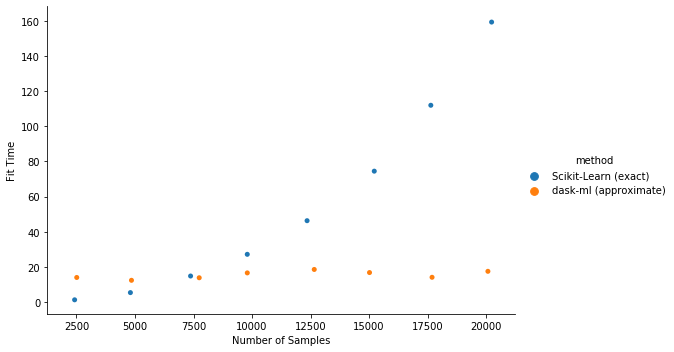

In [2]:
from sklearn.datasets import make_circles
from sklearn.utils import shuffle
import pandas as pd

from timeit import default_timer as tic
import sklearn.cluster
import dask_ml.cluster
import seaborn as sns

Ns = [2500, 5000, 7500, 10000, 12500, 15000]
X, y = make_circles(n_samples=10_000, noise=0.05, random_state=0, factor=0.5)
X, y = shuffle(X, y)

timings = []
for n in Ns:
    X, y = make_circles(n_samples=n, random_state=n, noise=0.5, factor=0.5)
    t1 = tic()
    sklearn.cluster.SpectralClustering(n_clusters=2).fit(X)
    timings.append(('Scikit-Learn (exact)', n, tic() - t1))
    t1 = tic()
    dask_ml.cluster.SpectralClustering(n_clusters=2, n_components=100).fit(X)
    timings.append(('dask-ml (approximate)', n, tic() - t1))


df = pd.DataFrame(timings, columns=['method', 'Number of Samples', 'Fit Time'])
sns.catplot(x='Number of Samples', y='Fit Time', hue='method',
               data=df, aspect=1.5)